In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\Project_Credit_Card\creditcard.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Text(0, 0.5, 'Fraudulent Transaction   Non-Fraudulent Transaction')

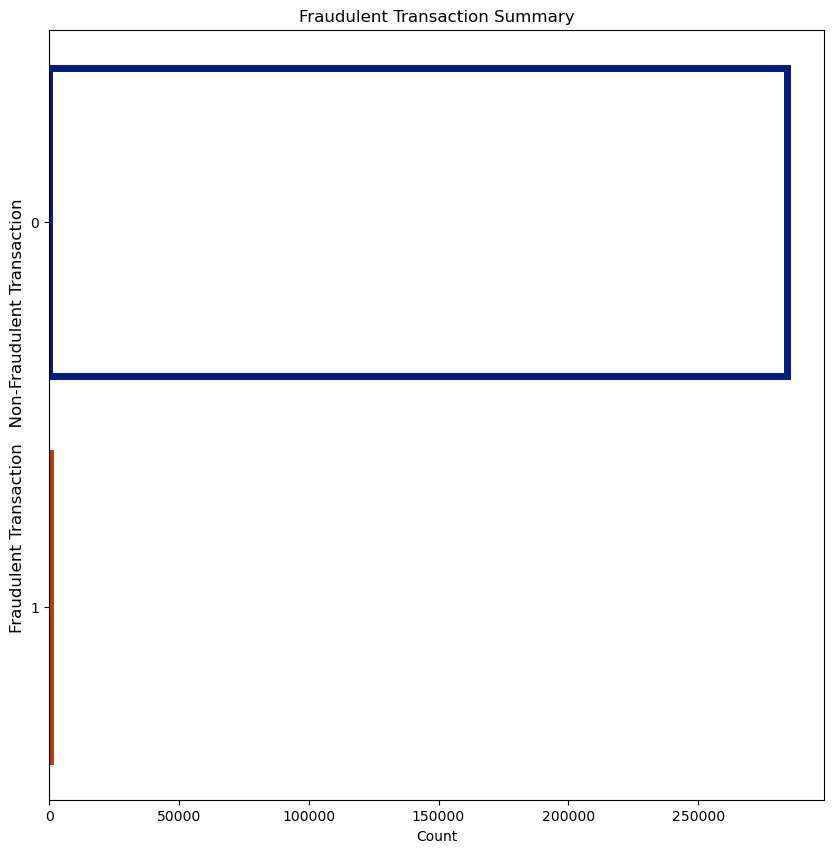

In [4]:
plt.figure(figsize=(10,10))
sns.countplot(
    y="Class", 
    data=data,
    facecolor=(0, 0, 0, 0),
    linewidth=5, 
    edgecolor=sns.color_palette("dark", 2))

plt.title('Fraudulent Transaction Summary')
plt.xlabel('Count')
plt.ylabel('Fraudulent Transaction   Non-Fraudulent Transaction', fontsize=12)

In [5]:
data['Class']= data['Class'].astype('category')

C:\Users\Я\AppData\Local\Temp\ipykernel_18696\1973328550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Time'])


<AxesSubplot: xlabel='Time', ylabel='Density'>

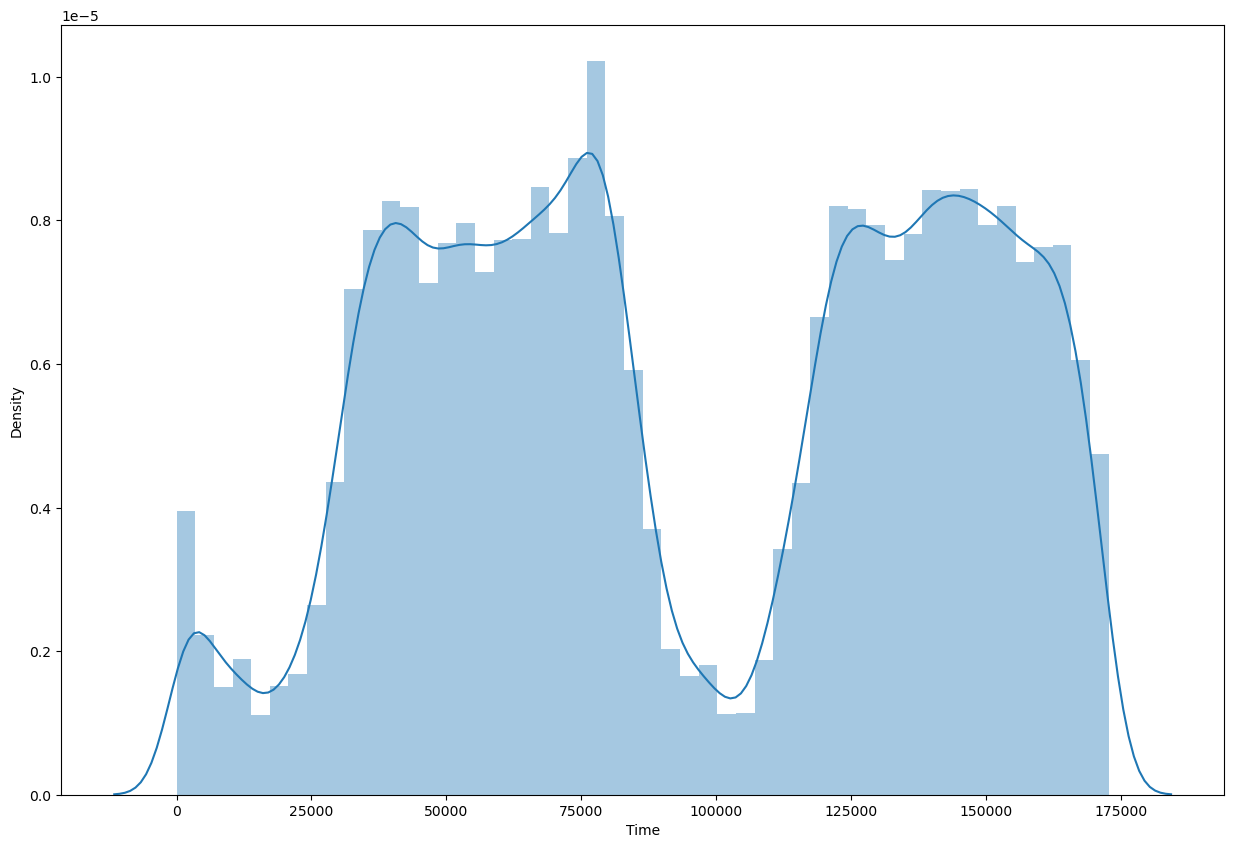

In [6]:
plt.figure(figsize=(15,10))
sns.distplot(data['Time'])

C:\Users\Я\AppData\Local\Temp\ipykernel_18696\2524711796.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Amount'])


<AxesSubplot: xlabel='Amount', ylabel='Density'>

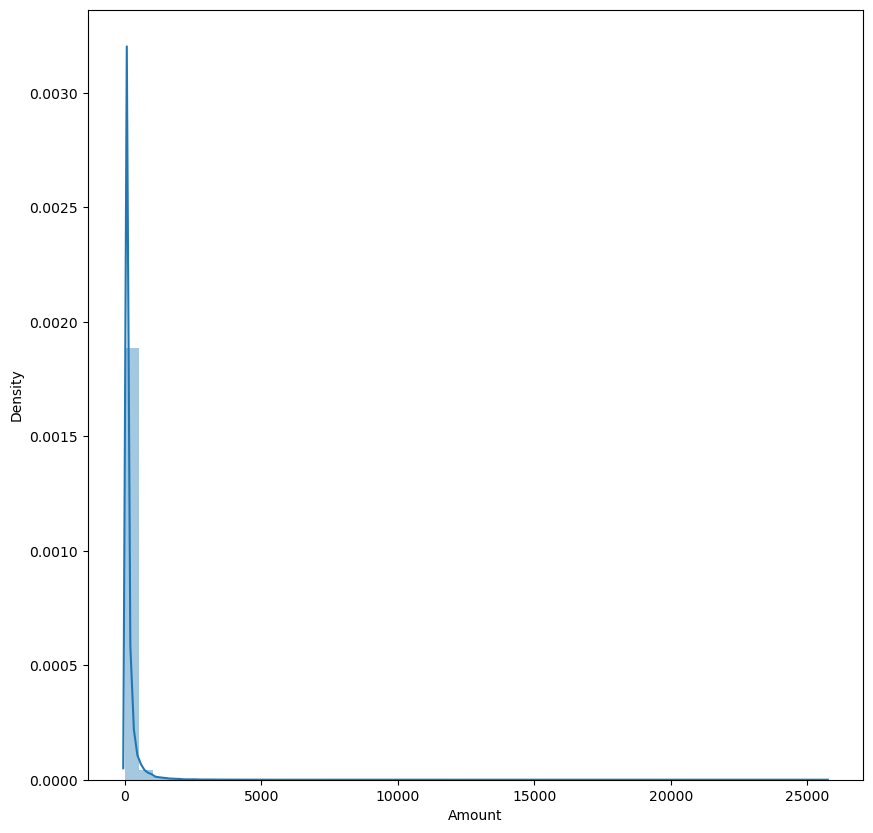

In [7]:
plt.figure(figsize=(10,10))
sns.distplot(data['Amount'])

In [8]:
data['Hour'] = data['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)

pd.pivot_table(
    columns="Class", 
    index="Hour", 
    values= 'Amount', 
    aggfunc='count', 
    data=data)

Class,0,1
Hour,,
0.0,10919,21
1.0,7687,6
2.0,4212,10
3.0,3269,57
4.0,3476,17
5.0,2185,23
6.0,2979,11
7.0,4093,9
8.0,7219,23


Text(0.5, 1.0, 'Fraudulent Transaction')

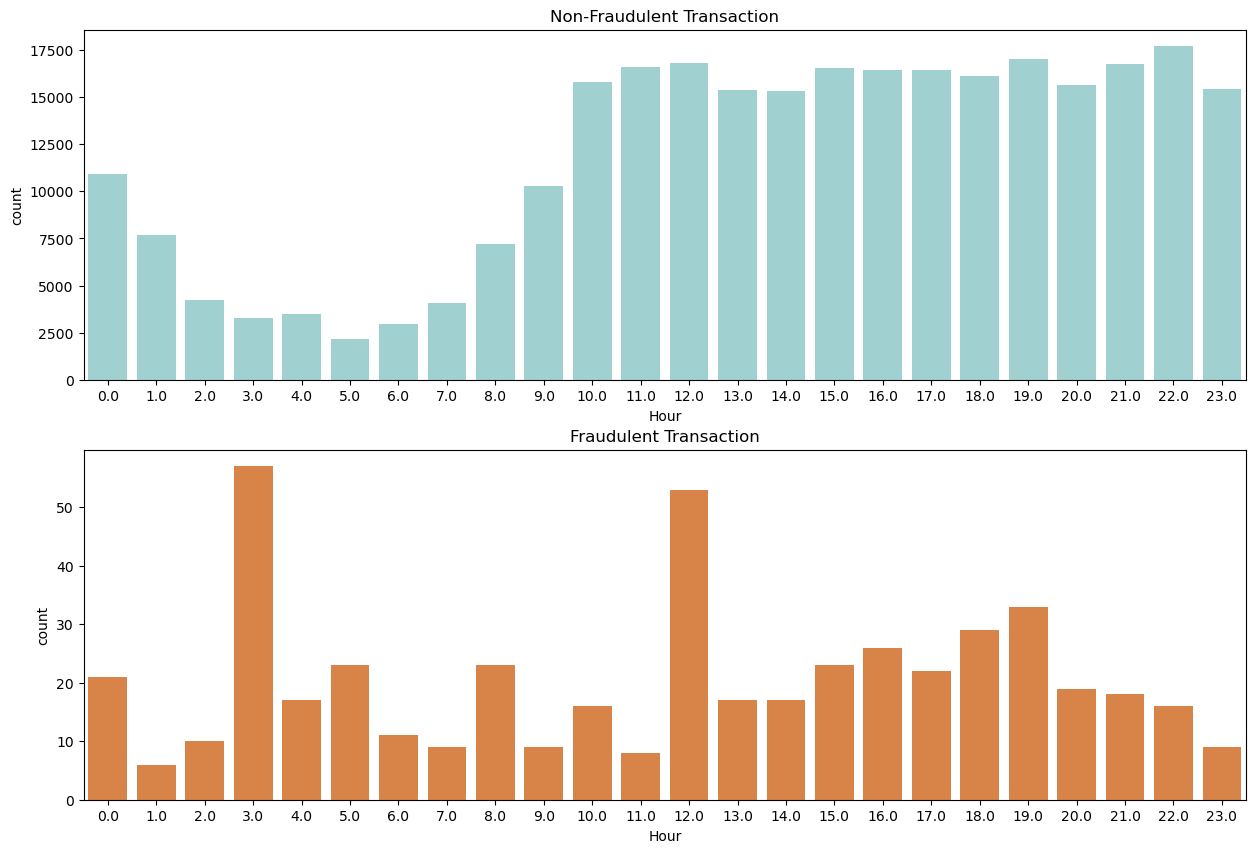

In [9]:
#Hour vs Class
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(
    x="Hour",
    data=data[data['Class'] == 0], 
    color="#98D8D8",  
    ax=axes[0])
axes[0].set_title("Non-Fraudulent Transaction")


sns.countplot(
    x="Hour",
    data=data[data['Class'] == 1],
    color="#F08030", 
    ax=axes[1])
axes[1].set_title("Fraudulent Transaction")

C:\Users\Я\AppData\Local\Temp\ipykernel_18696\3442905925.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_new = data_nonfraud.append(data_fraud).sample(frac=1)


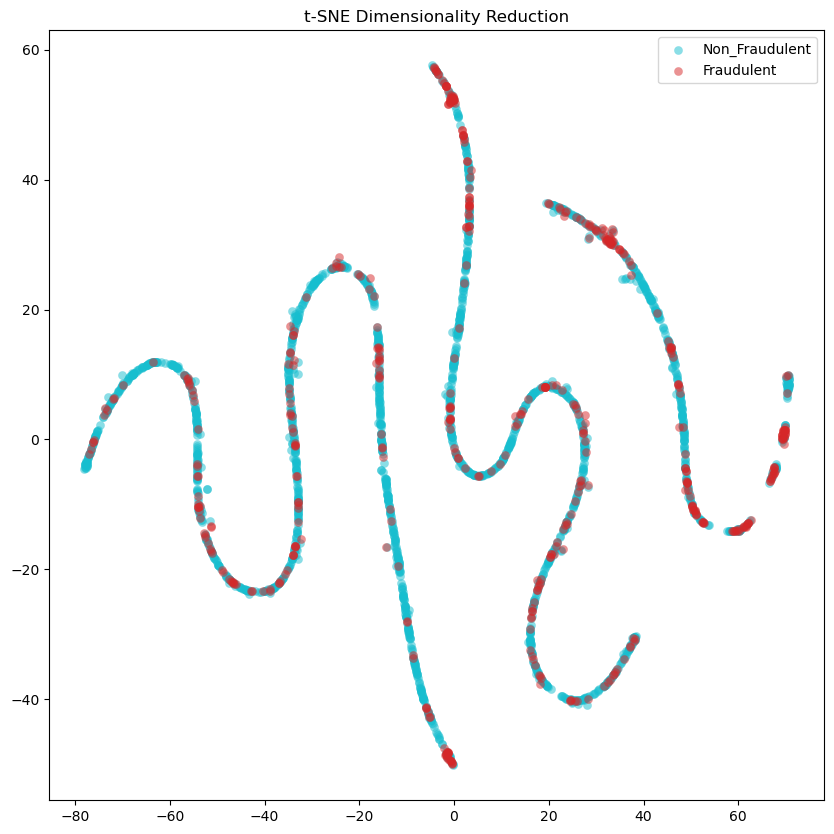

In [10]:
data_nonfraud = data[data['Class'] == 0].sample(2000)
data_fraud  = data[data['Class'] == 1]

data_new = data_nonfraud.append(data_fraud).sample(frac=1)
X = data_new.drop(['Class'], axis = 1).values
y = data_new['Class'].values

tsne = TSNE(n_components=2, random_state=42)
X_transformation = tsne.fit_transform(X)

plt.figure(figsize=(10, 10))
plt.title("t-SNE Dimensionality Reduction")

def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Non_Fraudulent", alpha=0.5, linewidth=0.15, c='#17becf')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Fraudulent", alpha=0.5, linewidth=0.15, c='#d62728')
    plt.legend()
    return plt.show()

plot_data(X_transformation, y)

In [11]:
data[['Time', 'Amount']] = StandardScaler().fit_transform(data[['Time', 'Amount']])

[17:18:13] WARNING: D:\bld\xgboost-split_1679035243975\work\src\learner.cc:767: 
Parameters: { "bootstrap", "criterion", "max_features", "n_estimators" } are not used.



<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

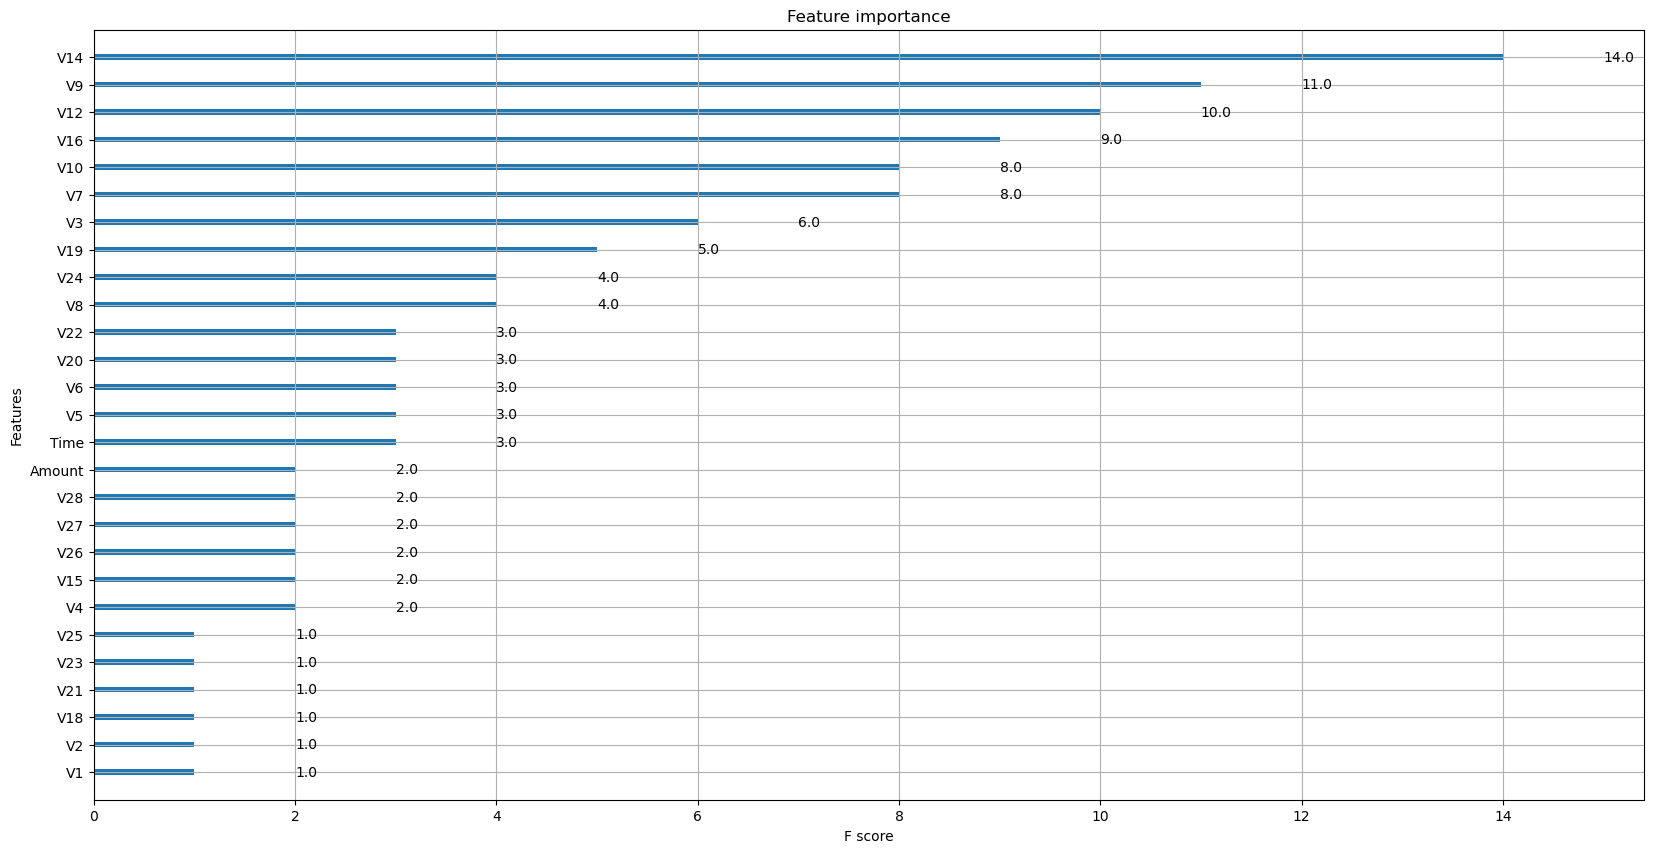

In [36]:
train_data, label_data = data.iloc[:,:-2],data.iloc[:,-2]

data_dmatrix = xgb.DMatrix(data=train_data, label= label_data)

X_train, X_test, y_train, y_test = train_test_split(
                                    train_data, label_data, test_size=0.3,random_state=42)
                                    
params = {
    'objective':'reg:logistic',
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'bootstrap': True, 
    'criterion': 'gini', 
    'max_depth': 4, 
    'max_features': 'auto', 
    'n_estimators': 50
}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

#Feature importance graph
plt.rcParams['figure.figsize'] = [20, 10]
xgb.plot_importance(xg_reg)

In [37]:
data_model = data.drop(['V13', 'V25', 'Time', 'V20', 'V22', 'V8', 'V15', 'V19', 'V2'], axis=1)

C:\Users\Я\AppData\Local\Temp\ipykernel_18696\310303736.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_undersampling = data_under_nonfraud.append(data_under_fraud,


Text(0, 0.5, 'Fraudulent Transaction,        Non-Fraudulent Transaction')

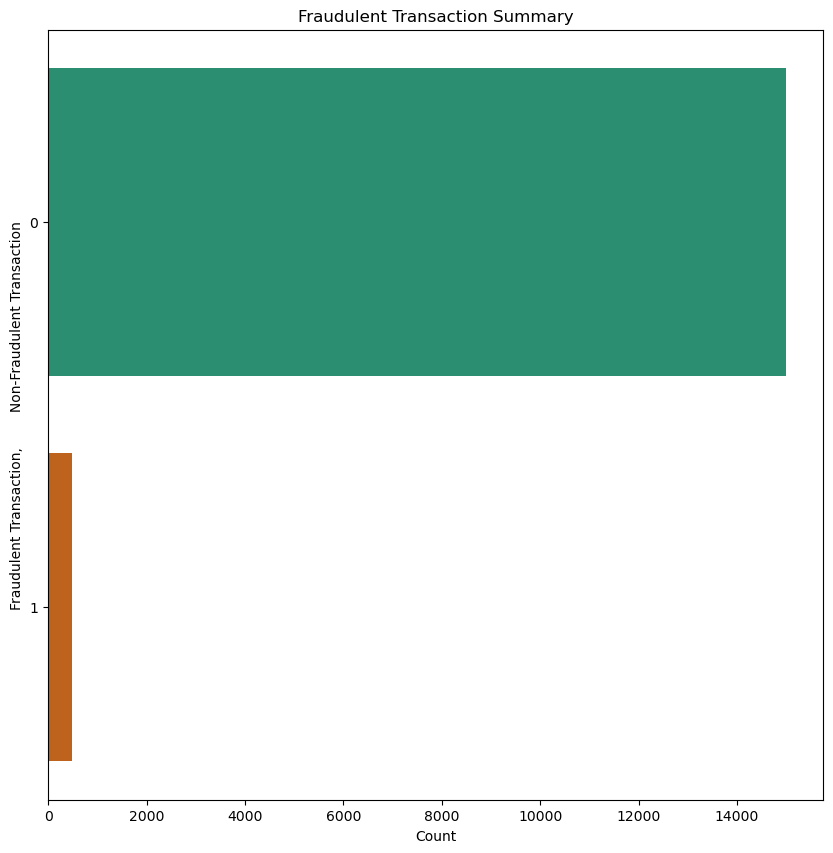

In [38]:
data_under_nonfraud = data_model[data_model['Class'] == 0].sample(15000)
data_under_fraud  = data_model[data_model['Class'] == 1]

data_undersampling = data_under_nonfraud.append(data_under_fraud, 
                                                ignore_index=True, sort=False)
                                                
plt.figure(figsize=(10,10))
sns.countplot(y="Class", data=data_undersampling,palette='Dark2')
plt.title('Fraudulent Transaction Summary')
plt.xlabel('Count')
plt.ylabel('Fraudulent Transaction,        Non-Fraudulent Transaction')

In [39]:
kfold_cv=KFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in kfold_cv.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [40]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', 
                                                  classes = np.unique(y_train),
                                                  y = y_train)

In [45]:
modelRF = RandomForestClassifier(
    n_estimators=500,  
    class_weight='balanced',
    criterion = 'gini', 
    max_depth = 4, 
    random_state=42
).fit(X_train, y_train)#, sample_weight=pd.Series(y_class_weights))

# Obtain predictions from the test data 
predict_RF = modelRF.predict(X_test)

In [46]:
modelkNN = KNeighborsClassifier(
    n_jobs=4,
    n_neighbors=5
).fit(X_train, y_train)#, sample_weight=pd.Series(y_class_weights))

# Obtain predictions from the test data 
predict_kNN = modelkNN.predict(X_test)

In [47]:
modelSVM = svm.SVC(
    kernel='rbf', 
    class_weight='balanced', 
    gamma='scale', 
    probability=True, 
    random_state=42
).fit(X_train, y_train)

# Obtain predictions from the test data 
predict_SVM = modelSVM.predict(X_test)

In [48]:
modelLR = LogisticRegression(
    solver='lbfgs', 
    multi_class='multinomial',
    class_weight='balanced', 
    max_iter=500, 
    random_state=42
).fit(X_train, y_train)

# Obtain predictions from the test data 
predict_LR = modelLR.predict(X_test)

In [ ]:
import joblib
# Сохранение модели
filename = 'LR_model.sav'
joblib.dump(modelLR, filename)

['LR_model.sav']

In [50]:
modelMLP = MLPClassifier(
    solver='lbfgs', 
    activation='logistic', 
    hidden_layer_sizes=(100,),
    learning_rate='constant', 
    max_iter=1500, 
    random_state=42
).fit(X_train, y_train)

# Obtain predictions from the test data 
predict_MLP = modelMLP.predict(X_test)

[Text(0.5, 0, 'Non-Fraud'), Text(1.5, 0, 'Fraud')]

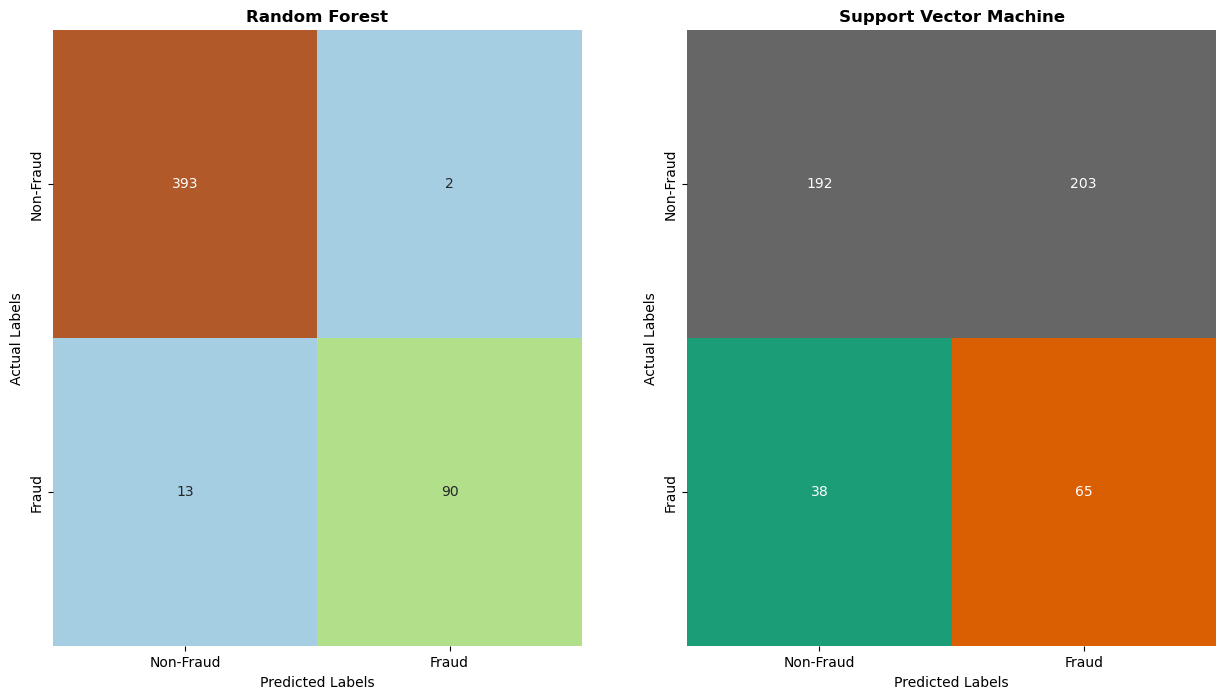

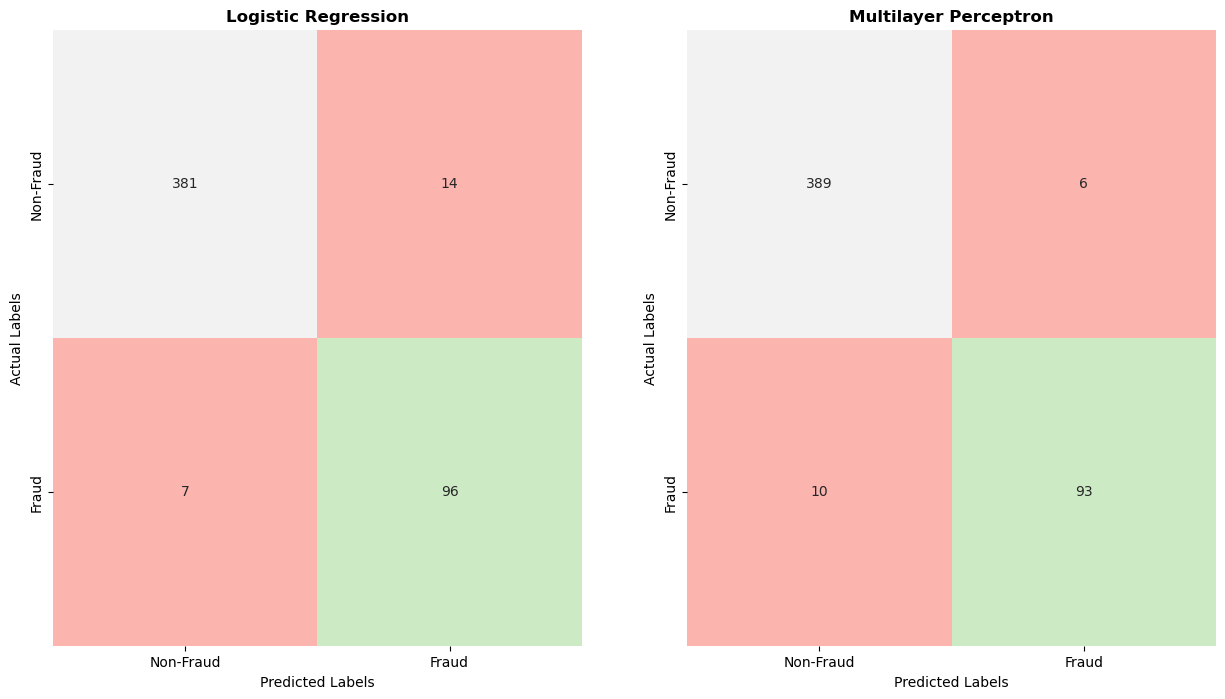

In [56]:
RF_matrix = confusion_matrix(y_test, predict_RF)
SVM_matrix = confusion_matrix(y_test, predict_SVM)
LR_matrix = confusion_matrix(y_test, predict_LR)
MLP_matrix = confusion_matrix(y_test, predict_MLP) 
kNN_matrix = confusion_matrix(y_test, predict_kNN)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.heatmap(RF_matrix, annot=True, fmt="d",cbar=False, cmap="Paired", ax = ax[0])
ax[0].set_title("Random Forest", weight='bold')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('Actual Labels')
ax[0].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
ax[0].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])

sns.heatmap(SVM_matrix, annot=True, fmt="d",cbar=False, cmap="Dark2", ax = ax[1])
ax[1].set_title("Support Vector Machine", weight='bold')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('Actual Labels')
ax[1].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
ax[1].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])

fig, axe = plt.subplots(1, 2, figsize=(15, 8))

sns.heatmap(LR_matrix, annot=True, fmt="d",cbar=False, cmap="Pastel1", ax = axe[0])
axe[0].set_title("Logistic Regression", weight='bold')
axe[0].set_xlabel('Predicted Labels')
axe[0].set_ylabel('Actual Labels')
axe[0].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
axe[0].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])

sns.heatmap(MLP_matrix, annot=True, fmt="d",cbar=False, cmap="Pastel1", ax = axe[1])
axe[1].set_title("Multilayer Perceptron", weight='bold')
axe[1].set_xlabel('Predicted Labels')
axe[1].set_ylabel('Actual Labels')
axe[1].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
axe[1].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])

In [53]:
print("Classification_RF:")
print(classification_report(y_test, predict_RF))
print("Classification_LR:")
print(classification_report(y_test, predict_LR))
print("Classification_MLP:")
print(classification_report(y_test, predict_MLP))

Classification_RF:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       395
           1       0.98      0.87      0.92       103

    accuracy                           0.97       498
   macro avg       0.97      0.93      0.95       498
weighted avg       0.97      0.97      0.97       498

Classification_SVM:
              precision    recall  f1-score   support

           0       0.83      0.49      0.61       395
           1       0.24      0.63      0.35       103

    accuracy                           0.52       498
   macro avg       0.54      0.56      0.48       498
weighted avg       0.71      0.52      0.56       498

Classification_LR:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       395
           1       0.87      0.93      0.90       103

    accuracy                           0.96       498
   macro avg       0.93      0.95      0.94       498
weighted avg    

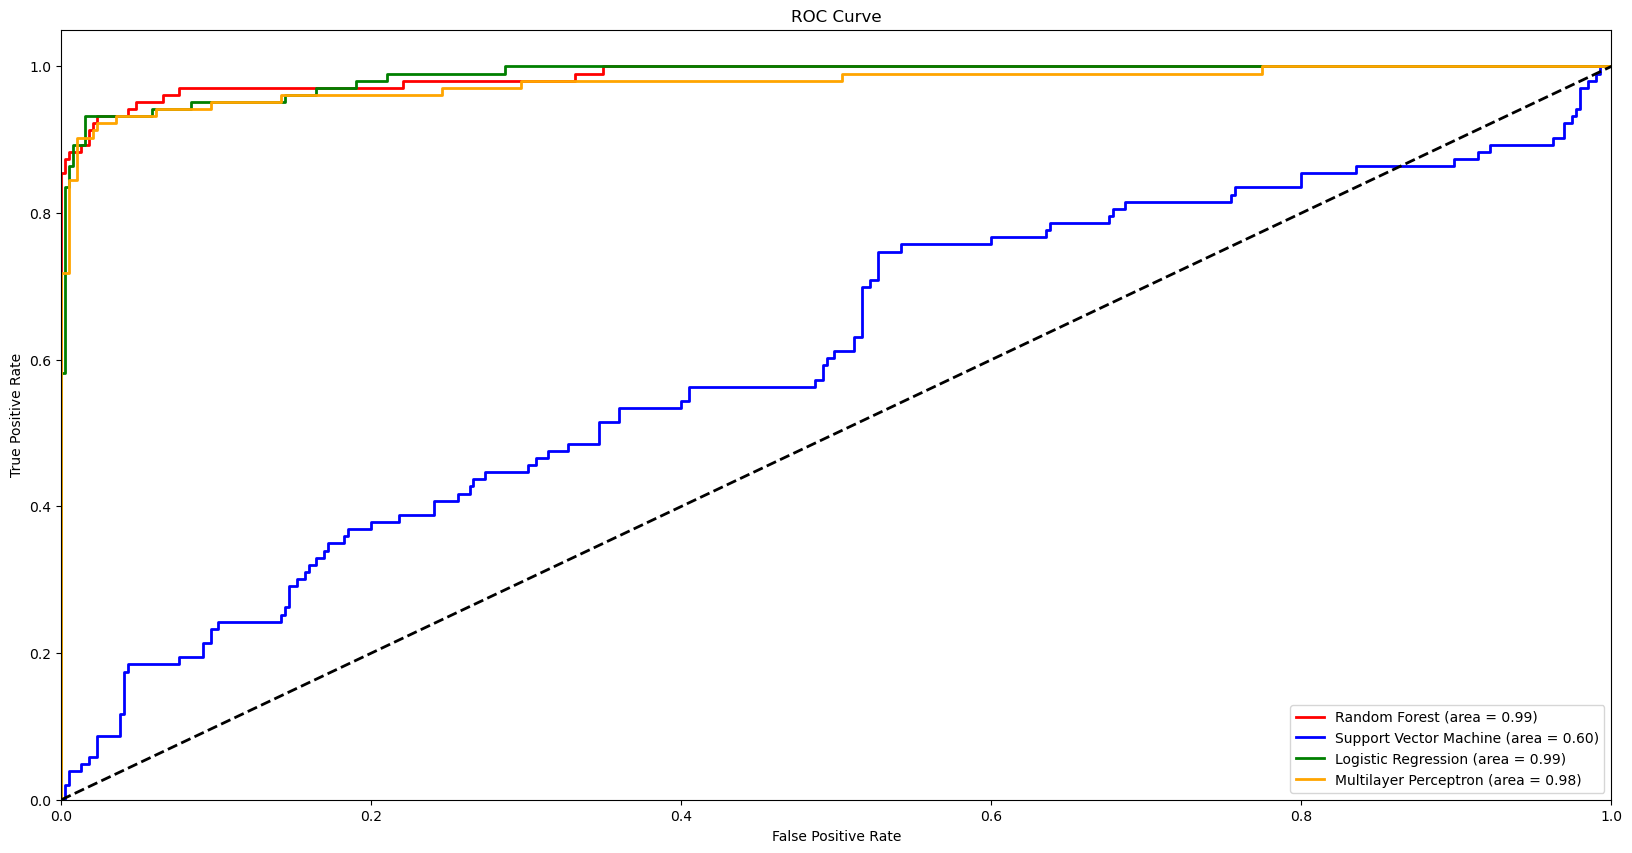

In [54]:
#RF AUC
rf_predict_probabilities = modelRF.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predict_probabilities)
rf_roc_auc = auc(rf_fpr, rf_tpr)

#SVM AUC
svm_predict_probabilities = modelSVM.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predict_probabilities)
svm_roc_auc = auc(svm_fpr, svm_tpr)

#LR AUC
lr_predict_probabilities = modelLR.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predict_probabilities)
lr_roc_auc = auc(lr_fpr, lr_tpr)

#MLP AUC
mlp_predict_probabilities = modelMLP.predict_proba(X_test)[:,1]
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_predict_probabilities)
mlp_roc_auc = auc(mlp_fpr, mlp_tpr)
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='red',lw=2,
         label='Random Forest (area = %0.2f)' % rf_roc_auc)

plt.plot(svm_fpr, svm_tpr, color='blue',lw=2, 
         label='Support Vector Machine (area = %0.2f)' % svm_roc_auc)

plt.plot(lr_fpr, lr_tpr, color='green',lw=2, 
         label='Logistic Regression (area = %0.2f)' % lr_roc_auc)

plt.plot(mlp_fpr, mlp_tpr, color='orange',lw=2, 
         label='Multilayer Perceptron (area = %0.2f)' % mlp_roc_auc)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [55]:
print("Average precision score of Logistic Regression", average_precision_score(y_test, modelLR.predict_proba(X_test)[:,1]))
print("Average precision score of Random Forest", average_precision_score(y_test, modelRF.predict_proba(X_test)[:,1]))
print("Average precision score of Multilayer Perceptron", average_precision_score(y_test, modelMLP.predict_proba(X_test)[:,1]))

Average precision score of Logistic Regression 0.9674302148685499
Average precision score of Random Forest 0.9733423297603496
Average precision score of Multilayer Perceptron 0.9598289922423594
